In [1]:
# Cell 1: Imports and Configuration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Set visualization style
sns.set_theme(style="whitegrid")
%matplotlib inline


In [2]:
# Cell 2: Data Loading
df = pd.read_csv('car_dataset_2000_rows.csv')

# Displaying dataset characteristics
print(f"Dataset Shape: {df.shape}")
display(df.head())
display(df.describe())

Dataset Shape: (2000, 10)


,brand,model,year,engine_size,fuel_type,transmission,mileage,car_type,drive_type,price
0,Suzuki,WagonR,2022,1.2,Hybrid,Manual,5950,Hatchback,AWD,6280794
1,Toyota,Corolla,2015,2.6,Electric,CVT,154572,Truck,AWD,1363381
2,Suzuki,Swift,2008,2.8,Petrol,Manual,46908,Sedan,AWD,7678389
3,Suzuki,Cultus,2018,2.1,Diesel,CVT,165760,Hatchback,FWD,6098764
4,Kia,Sportage,2023,2.5,Electric,Automatic,143133,Sedan,FWD,6689630


,year,engine_size,mileage,price
count,2000.00000,2000.000000,2000.000000,2.000000e+03
mean,2014.13250,2.396300,103180.273500,4.345622e+06
std,5.46158,0.928724,55391.847545,2.069889e+06
min,2005.00000,0.800000,5037.000000,8.012850e+05
25%,2009.00000,1.600000,55877.500000,2.585088e+06
50%,2014.00000,2.400000,102444.000000,4.304987e+06
75%,2019.00000,3.200000,149161.750000,6.099470e+06
max,2023.00000,4.000000,199898.000000,7.997116e+06


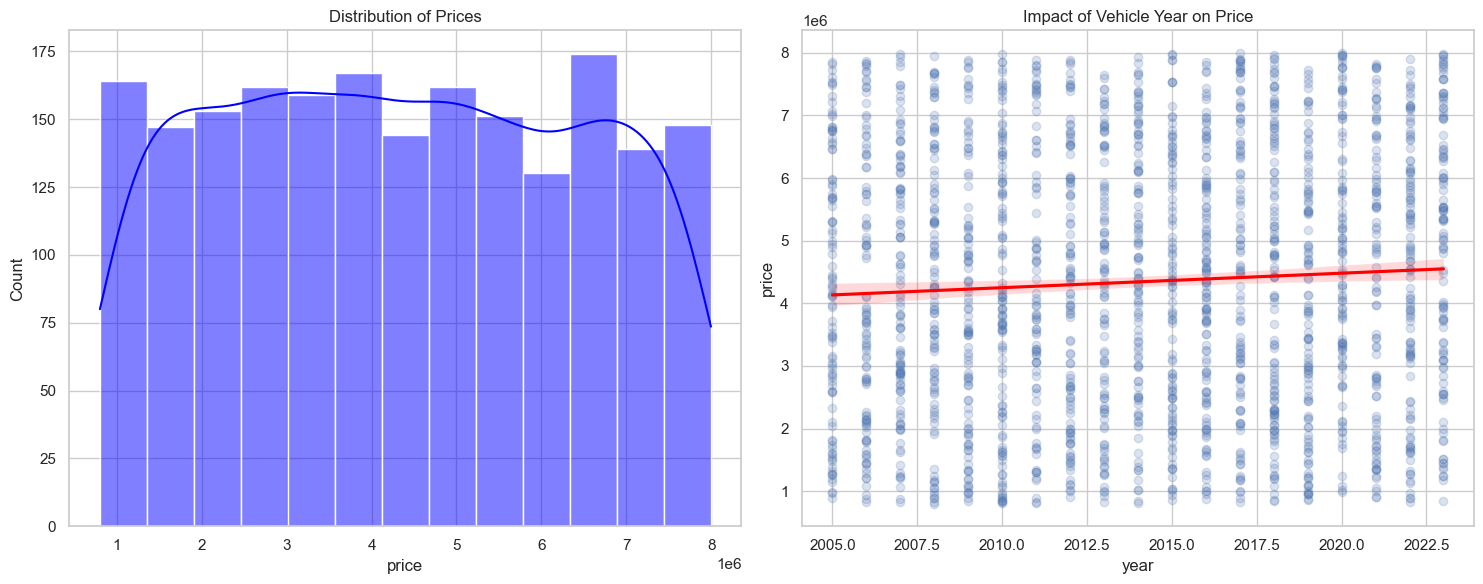

In [3]:
# Cell 3: Visual Analysis of Price Drivers
plt.figure(figsize=(15, 6))

# Subplot 1: Distribution of the Target
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, color='blue')
plt.title('Distribution of Prices')

# Subplot 2: Year vs Price (Regression Plot)
plt.subplot(1, 2, 2)
sns.regplot(data=df, x='year', y='price', scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.title('Impact of Vehicle Year on Price')

plt.tight_layout()
plt.show()

In [4]:
# Cell 4: Label Encoding
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
encoders = {}

categorical_cols = ['brand', 'model', 'fuel_type', 'transmission', 'car_type', 'drive_type']

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    encoders[col] = le

print("Categorical variables successfully transformed.")
display(df_encoded.head())

Categorical variables successfully transformed.


,brand,model,year,engine_size,fuel_type,transmission,mileage,car_type,drive_type,price
0,3,16,2022,1.2,2,2,5950,0,0,6280794
1,4,7,2015,2.6,1,1,154572,3,0,1363381
2,3,14,2008,2.8,3,2,46908,2,0,7678389
3,3,8,2018,2.1,0,1,165760,0,1,6098764
4,2,13,2023,2.5,1,0,143133,2,1,6689630


In [5]:
# Cell 5: Train/Test Split and Model Fitting
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

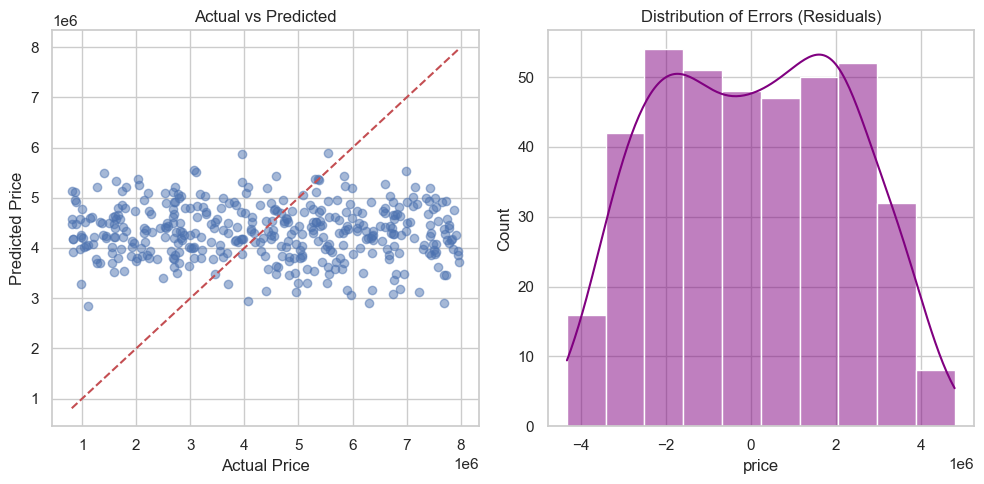

R2 Score: -0.1003
MAE: 1870990.28


In [6]:
# Cell 6: Residual Analysis
residuals = y_test - y_pred

plt.figure(figsize=(10, 5))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted')

# Plot 2: Error Distribution
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Errors (Residuals)')

plt.tight_layout()
plt.show()

# Final Metrics
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")

In [7]:
# Cell 7: Save for FastAPI Integration
joblib.dump(model, 'car_price_model.pkl')
joblib.dump(encoders, 'label_encoders.pkl')
joblib.dump(list(X.columns), 'model_columns.pkl')
print("Model and Encoders saved for FastAPI deployment.")

Model and Encoders saved for FastAPI deployment.
